In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from kneed import KneeLocator

# silhoutte score
from sklearn.metrics import silhouette_score

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[ 2.34845951, -6.90584668],
       [ 3.63761147, -5.88980754],
       [ 0.09682366, -6.25428191],
       ...,
       [ 8.03028433, -7.35154588],
       [ 5.47652053, -6.95768711],
       [ 7.69895033, -6.57855189]])

In [5]:
y

array([0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1,
       0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2,
       1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1,
       2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0,
       1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1,

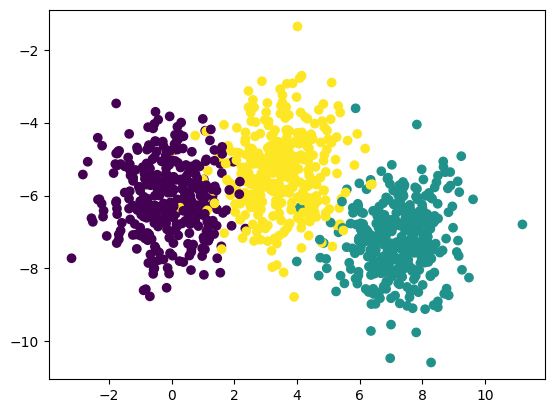

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### Train-Test Split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Standardization

In [11]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Elbow Method - To select k value

In [13]:
WCSS=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    WCSS.append(kmeans.inertia_)

In [14]:
WCSS

[1400.0,
 653.1981975902345,
 442.42962954405886,
 363.3154933786304,
 265.8202476976726,
 208.44753100635458,
 184.7421309784117,
 173.6228848968464,
 149.56432487302078,
 130.4989129581778]

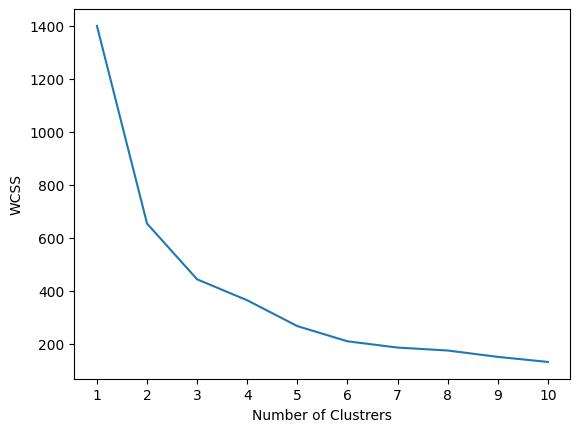

In [16]:
## plot elbow curve
plt.plot(range(1,11),WCSS)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [18]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2,
       0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2,
       0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2,

In [19]:
y_pred=kmeans.predict(X_test_scaled)

In [20]:
y_pred

array([0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2,
       1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2,
       0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2,
       1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0,
       0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2], d

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [23]:
# Validating the k value
# kneelocator
# Silhoutee scoring

In [26]:
kl=KneeLocator(range(1,11),WCSS,curve="convex",direction="decreasing")

In [27]:
kl.elbow

np.int64(3)

In [29]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients

[np.float64(0.4824673170130016),
 np.float64(0.43018972756019835),
 np.float64(0.39088682986954926),
 np.float64(0.37155728251312536),
 np.float64(0.351397820877284),
 np.float64(0.3831058052252885),
 np.float64(0.39267348553777276),
 np.float64(0.3731766965419092),
 np.float64(0.3629768277810268)]

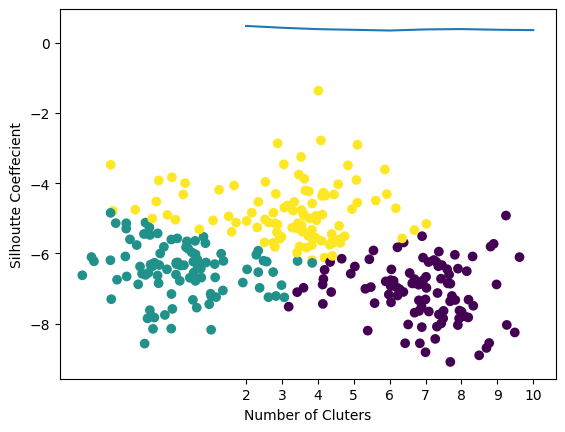

In [31]:
# plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()